## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and Sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [5]:
#Age
for key in df.keys():
    mean = df[key].mean()
    var = df[key].var()
    std = df[key].std()
    print(f"{key}: Mean = {mean}, Variance = {var}, Standard Deviation = {std}")

AGE: Mean = 48.51809954751131, Variance = 171.84661043904742, Standard Deviation = 13.109027822041092
SEX: Mean = 1.4683257918552035, Variance = 0.2495613630067412, Standard Deviation = 0.4995611704353544
BMI: Mean = 26.37579185520362, Variance = 19.519798124377957, Standard Deviation = 4.4181215606157735
BP: Mean = 94.64701357466062, Variance = 191.30440103836406, Standard Deviation = 13.831283419782999
S1: Mean = 189.14027149321268, Variance = 1197.7172407424507, Standard Deviation = 34.60805167504306
S2: Mean = 115.43914027149322, Variance = 924.9554940437713, Standard Deviation = 30.413080969276546
S3: Mean = 49.78846153846154, Variance = 167.2935853828711, Standard Deviation = 12.934202154863327
S4: Mean = 4.070248868778281, Variance = 1.6652609356563137, Standard Deviation = 1.2904498966082774
S5: Mean = 4.641410859728507, Variance = 0.2728918982944973, Standard Deviation = 0.5223905610694907
S6: Mean = 91.26018099547511, Variance = 132.16571243882169, Standard Deviation = 11.496

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

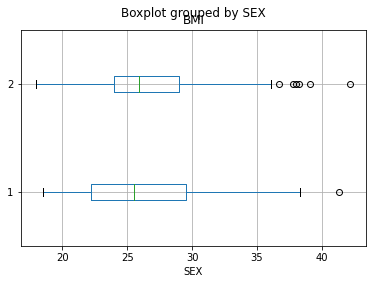

In [11]:
df.boxplot(column='BMI',by='SEX',vert=False)
plt.show()

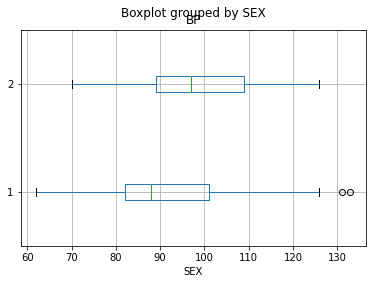

In [12]:
df.boxplot(column='BP',by='SEX',vert=False)
plt.show()

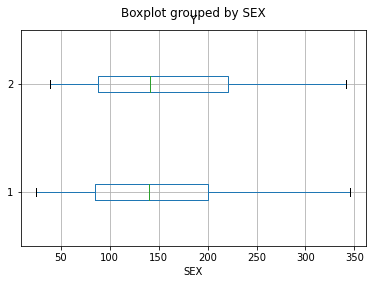

In [13]:
df.boxplot(column='Y',by='SEX',vert=False)
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

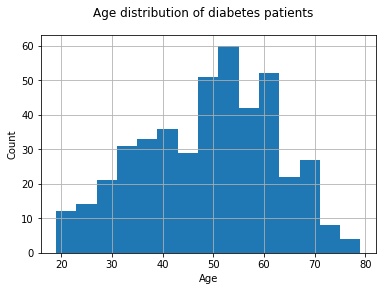

In [16]:
#AGE

df['AGE'].hist(bins=15)
plt.suptitle('Age distribution of diabetes patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Answer: Normal distribution

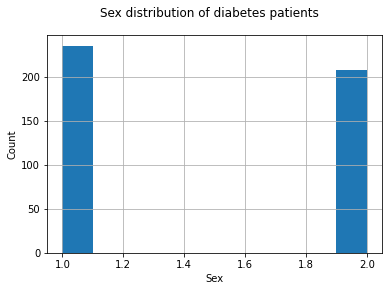

In [19]:
#SEX

df['SEX'].hist(bins=10)
plt.suptitle('Sex distribution of diabetes patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Answer: Continuous Uniform Distribution

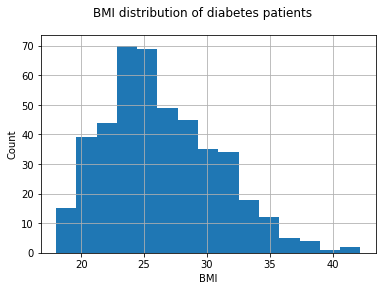

In [21]:
#BMI

df['BMI'].hist(bins=15)
plt.suptitle('BMI distribution of diabetes patients')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#Answer: Normal distribution

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [37]:
age = df['AGE']
bmi = df['BMI']
bp = df['BP']
y = df['Y']
sex = df['SEX']

print("Correlation between BMI and Age: ")
print(f"Covariance matrix:\n{np.cov(age,bmi)}")
print(f"Covariance = {np.cov(age,bmi)[0,1]}")
print(f"Correlation = {np.corrcoef(age,bmi)[0,1]}")
print("*********************************************************")
print("Correlation between BMI and BP: ")
print(f"Covariance matrix:\n{np.cov(bp,bmi)}")
print(f"Covariance = {np.cov(bp,bmi)[0,1]}")
print(f"Correlation = {np.corrcoef(bp,bmi)[0,1]}")
print("*********************************************************")
print("Correlation between SEX and Y: ")
print(f"Covariance matrix:\n{np.cov(sex,y)}")
print(f"Covariance = {np.cov(sex,y)[0,1]}")
print(f"Correlation = {np.corrcoef(sex,y.fillna(method='pad'))[0,1]}")

Correlation between BMI and Age: 
Covariance matrix:
[[171.84661044  10.71960015]
 [ 10.71960015  19.51979812]]
Covariance = 10.719600147751404
Correlation = 0.18508466614655544
*********************************************************
Correlation between BMI and BP: 
Covariance matrix:
[[191.30440104  24.16288446]
 [ 24.16288446  19.51979812]]
Covariance = 24.16288445634665
Correlation = 0.3954108987177128
*********************************************************
Correlation between SEX and Y: 
Covariance matrix:
[[2.49561363e-01 1.65843260e+00]
 [1.65843260e+00 5.94333135e+03]]
Covariance = 1.658432603810755
Correlation = 0.04306199845160536


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [38]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [42]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, Mens degree of diabetes progression: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, Women degree of diabetes progression: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

print("The degree of womens diabetes progression is higher than mens")

Conf=0.85, Mens degree of diabetes progression: 141.87..156.17, Women degree of diabetes progression: 147.79..163.55
Conf=0.90, Mens degree of diabetes progression: 140.84..157.20, Women degree of diabetes progression: 146.66..164.68
Conf=0.95, Mens degree of diabetes progression: 139.27..158.78, Women degree of diabetes progression: 144.92..166.42
The degree of womens diabetes progression is higher than mens
